<a href="https://colab.research.google.com/github/aaryapandya12/ml-course-practice/blob/main/IPL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('IPL.csv')

In [4]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [6]:
df.shape

(74, 20)

In [7]:
df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


<Axes: ylabel='match_winner'>

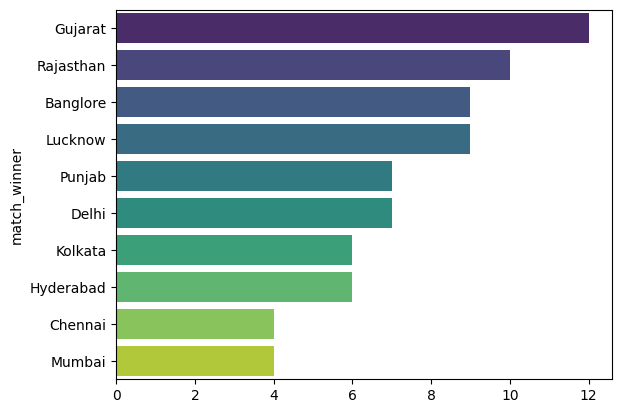

In [11]:
match_wins = df['match_winner'].value_counts()
sns.barplot(y=match_wins.index,x=match_wins.values,palette='viridis')

<Axes: xlabel='toss_decision', ylabel='count'>

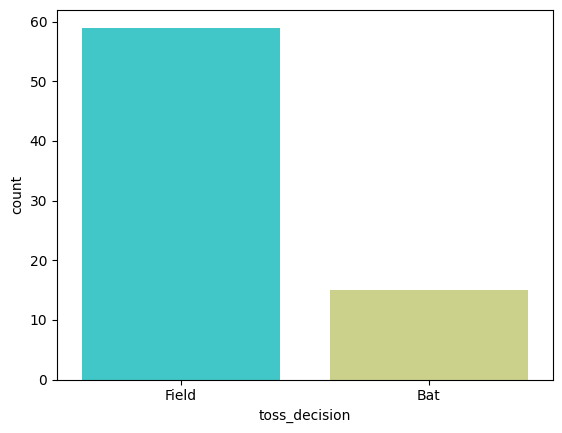

In [13]:
sns.countplot(x=df['toss_decision'],palette='rainbow')

In [18]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/df.shape[0]

In [19]:
percentage.round(2)

np.float64(48.65)

<Axes: xlabel='won_by', ylabel='count'>

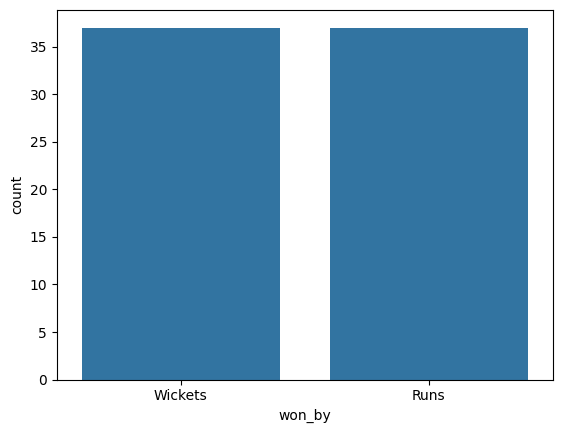

In [20]:
sns.countplot(x=df['won_by'])

In [23]:
count = df['player_of_the_match'].value_counts().head(10)

In [24]:
count

,count
player_of_the_match,
Kuldeep Yadav,4
Jos Buttler,3
Wanindu Hasaranga,2
Umesh Yadav,2
Quinton de Kock,2
Shubman Gill,2
Avesh Khan,2
Dinesh Karthik,2
Hardik Pandya,2


<Axes: ylabel='player_of_the_match'>

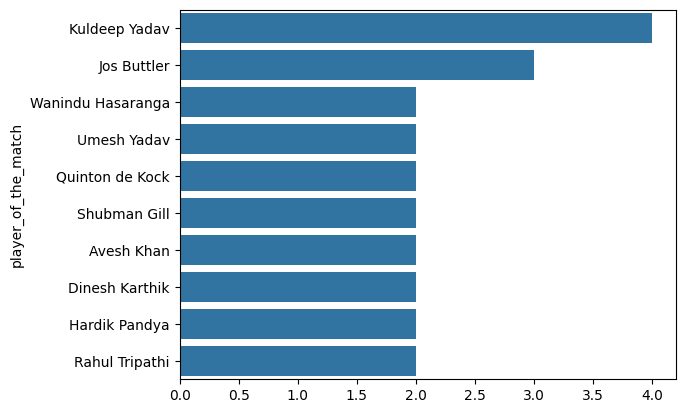

In [26]:
sns.barplot(y=count.index,x=count.values)

In [28]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

,highscore
top_scorer,
Jos Buttler,651
Quinton de Kock,377


<Axes: ylabel='top_scorer'>

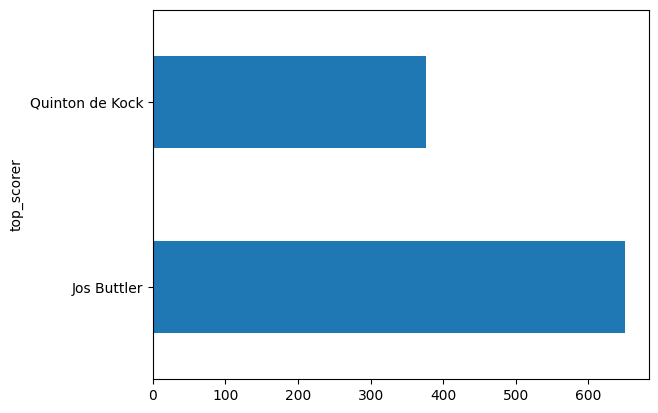

In [30]:
high.plot(kind='barh')

In [33]:
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x:x.split('--')[0])

In [34]:
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,...,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26,3
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,...,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14,1
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,...,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43,3
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,...,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22,3


In [35]:
df['highest_wickets'] = df['highest_wickets'].astype(int)

In [37]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

,highest_wickets
best_bowling,
Yuzvendra Chahal,17
Jasprit Bumrah,11
Kuldeep Yadav,11
Rashid Khan,11
Josh Hazlewood,10
Kagiso Rabada,10
Avesh Khan,10
Umran Malik,9
Wanindu Hasaranga,9


<Axes: ylabel='best_bowling'>

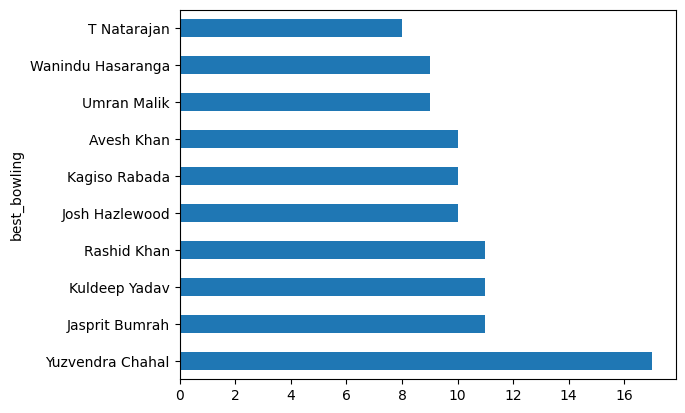

In [38]:
top_bowlers.plot(kind='barh')

In [39]:
venue_count = df['venue'].value_counts()
venue_count

,count
venue,
"Wankhede Stadium, Mumbai",21
"Dr DY Patil Sports Academy, Mumbai",20
"Brabourne Stadium, Mumbai",16
"Maharashtra Cricket Association Stadium,Pune",13
"Eden Gardens, Kolkata",2
"Narendra Modi Stadium, Ahmedabad",2


<Axes: ylabel='venue'>

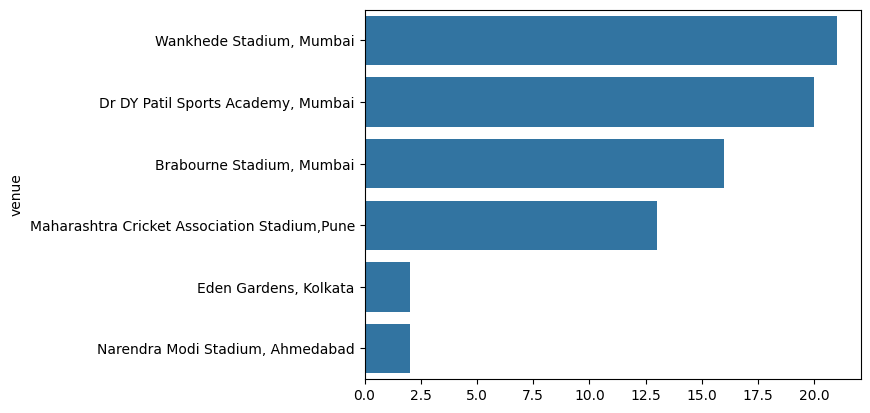

In [41]:
sns.barplot(y=venue_count.index,x=venue_count.values)

In [44]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


In [46]:
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


In [48]:
df[df['highest_wickets']==df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
